## Lab 9: Implement temporal-difference learning in a simulated environment.

### Initialisation

In [1]:
import numpy as np

grid_size = 4
alpha = 0.1 
gamma = 0.9 
n_episodes = 500 
reward_goal = 1.0 
reward_step = -0.1

V = np.zeros((grid_size, grid_size))
goal_state = (grid_size - 1, grid_size - 1) 
V[goal_state] = reward_goal  

actions = ['up', 'down', 'left', 'right']
action_effects = {
    'up': (-1, 0),
    'down': (1, 0),
    'left': (0, -1),
    'right': (0, 1)
}

### Terminal check

In [2]:
def is_terminal(state):
    return state == goal_state

### Next State,

In [3]:
def get_next_state(state, action):
    row, col = state
    dr, dc = action_effects[action]
    new_row, new_col = row + dr, col + dc
    if new_row < 0 or new_row >= grid_size or new_col < 0 or new_col >= grid_size:
        return state  
    return (new_row, new_col)

### Temporal-difference learning

In [4]:
import random
def run_episode():
    state = (0, 0)
    while not is_terminal(state):
        action = random.choice(actions)
        next_state = get_next_state(state, action)
        reward = reward_goal if next_state == goal_state else reward_step
        V[state] += alpha * (reward + gamma * V[next_state] - V[state])
        state = next_state 

### Execution

In [7]:
for episode in range(n_episodes):
    run_episode()
    if episode % 100 == 0:
        print(f"Episode {episode}:")
        print(V)

Episode 0:
[[-0.80173423 -0.74831637 -0.65136492 -0.51916983]
 [-0.76383202 -0.65926715 -0.3926582  -0.18979011]
 [-0.67023475 -0.48037961  0.01799904  0.41547355]
 [-0.60070608 -0.37729762  0.54983307  1.        ]]
Episode 100:
[[-0.74616361 -0.66611018 -0.64220624 -0.60417068]
 [-0.69491074 -0.54478316 -0.37338477 -0.20587743]
 [-0.53333628 -0.2667921   0.03109469  0.52856911]
 [-0.45378423  0.11654444  0.79341019  1.        ]]
Episode 200:
[[-0.81284838 -0.78748308 -0.63205398 -0.47105366]
 [-0.76744191 -0.70905955 -0.58182391 -0.28260753]
 [-0.66056501 -0.5279983  -0.03550163  0.30536698]
 [-0.53971163 -0.3550485   0.4909097   1.        ]]
Episode 300:
[[-0.7304447  -0.69559652 -0.60439905 -0.46842878]
 [-0.64487484 -0.58885845 -0.43162791 -0.26257355]
 [-0.58303109 -0.4352568  -0.1168327   0.44793567]
 [-0.51857136 -0.22025279  0.85366701  1.        ]]
Episode 400:
[[-0.76898365 -0.70269331 -0.61456145 -0.57248567]
 [-0.73233792 -0.64971469 -0.47884348 -0.33753197]
 [-0.66039823 -

### Visualisation

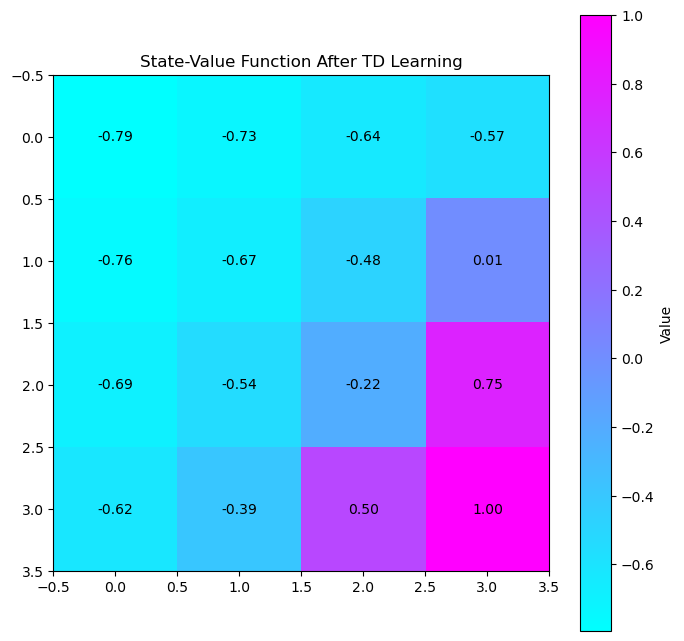

In [8]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 8))
plt.imshow(V, cmap='cool', interpolation='none', origin='upper')
for i in range(grid_size):
    for j in range(grid_size):
        plt.text(j, i, f"{V[i, j]:.2f}", ha='center', va='center', color='black')
plt.title("State-Value Function After TD Learning")
plt.colorbar(label="Value")
plt.show()

## END